## Analyse data from Joyce et al. 2021 GRL

### Procedure
- Use the dynamic atmospheric transport control data for Point Barrow (where eveything is variable). See file names.
- Aggregate data in yearly files into a pandas dataframe
- Calculate monthly means
- Read in Point Barrow observations data
- Plot simulated vs observed CO2 (Joyce figure S8)
- Apply ccgcrv to observed and simulations to get a fit to seasonal CO2
- Calculate CO2 seasonal amplitude changes and plot

In [1]:
# Set python environment to conda 'recovery' 
import pandas as pd
from pathlib import Path
import os
from glob import glob
import sys
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Read in files
file_brw_obs = Path("../data/stations/monthly_comp/BRW_station_co2_observed_insitu.csv")
file_brw_joyce_varyall = Path("../data/stations/monthly_comp/BRW_station_co2_joyce_varyall.csv")
brw_obs = pd.read_csv(file_brw_obs, header=0, names=['decimal_year', 'co2_obs'])
brw_jva = pd.read_csv(file_brw_joyce_varyall, header=0, names=['decimal_year', 'co2_joyce'])

In [12]:
# Merge the data
co2_brw = pd.merge(brw_obs, brw_jva, on="decimal_year")

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = co2_brw.loc[:, 'decimal_year'].values.reshape(-1, 1) # sklearn fit requires a two dimensional array

nna = co2_brw["co2_obs"].notna()
y = co2_brw.loc[nna, 'co2_obs'].values.reshape(-1, 1)
model.fit(X[nna], y)
y_predict = model.predict(X)
co2_brw['co2_obs_tr'] = pd.Series(y_predict.reshape(-1))
co2_brw['co2_obs_dt'] = co2_brw['co2_obs'] - co2_brw['co2_obs_tr']

nna = co2_brw["co2_obs"].notna()
y = co2_brw.loc[nna, 'co2_joyce'].values.reshape(-1, 1)
model.fit(X[nna], y)
y_predict = model.predict(X)
co2_brw['co2_joyce_tr'] = pd.Series(y_predict.reshape(-1))
co2_brw['co2_joyce_dt'] = co2_brw['co2_joyce'] - co2_brw['co2_joyce_tr']
co2_brw.to_csv('co2_brw.csv')

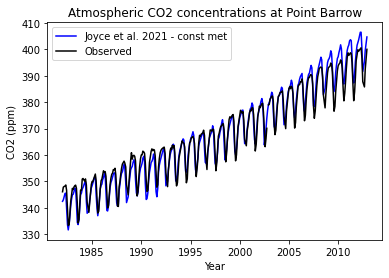

In [24]:
# Plot time series
plt.close()
plt.plot(co2_brw['decimal_year'], co2_brw['co2_joyce'], color='blue', label='Joyce et al. 2021 - const met')
plt.plot(co2_brw['decimal_year'], co2_brw['co2_obs'], color='black', label='Observed')
plt.title('Atmospheric CO2 concentrations at Point Barrow')
plt.legend(loc="upper left")
plt.ylabel('CO2 (ppm)')
plt.xlabel('Year')
plt.show()

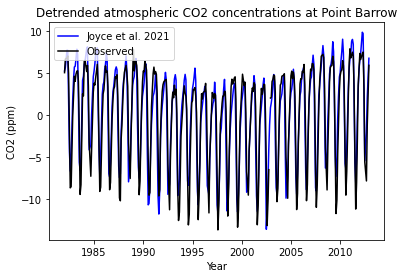

In [23]:
plt.clf()
plt.plot(co2_brw['decimal_year'], co2_brw['co2_joyce_dt'], color='blue', label='Joyce et al. 2021')
plt.plot(co2_brw['decimal_year'], co2_brw['co2_obs_dt'], color='black', label='Observed')
plt.legend(loc="upper left")
plt.title('Detrended atmospheric CO2 concentrations at Point Barrow')
plt.ylabel('CO2 (ppm)')
plt.xlabel('Year')
plt.show()

## Fitting ccgcrv and sensitivity analysis